# Introduction to NumPy (1h30)


> Session inspired by previous [ML@Cezeaux NumPy tutorial](https://github.com/MLatCezeaux/intro_numpy) and the [lecture of python for data analysis](https://github.com/rmadar/lecture-python) given at the [Data science Training of UCA](https://www.uca.fr/formation/nos-formations/catalogue-des-formations/du-data-scientist).

This NumPy introduction is a set of selected topics from the full lecture, in order to last ~1h30. The goal of the session is to expose basics of numpy arrays, but also discuss some more complex scenarios that one can encounter in practice. Finally, there is one concrete problem treated both in pure python and numpy. At the end, the take away message are both NumPy strength and NumPy limitations.

0. **Introduction** (5')
   1. Why NumPy in a ML lecture series?
   1. Goal of this session


1. **Basics** (25')
   1. Difference between python and numpy objects
   1. Properties of NumPy arrays
   1. Three numpy features: vectorization, indexing, broadcasting


2. **More advanced** (30')
   1. Non-trivial broadcasting
   1. Non-trivial vectorization: 2D plot and the (in)famous `meshgrid`
   
   
3. **Python *v.s.* NumPy: a concrete example** (30')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introduction

## Basics

### List *v.s.* Array

In [6]:
# Sum
l1 = [1, 2, 3]
l2 = [4, 5, 6]
print(l1+l2)

a1 = np.array(l1)
a2 = np.array(l2)
print(a1+a2)

[1, 2, 3, 4, 5, 6]
[5 7 9]


In [9]:
# Product (number * list, list * list)
l1 = [1, 2, 3]
l2 = [4, 5, 6]
print(l1*3)

a1 = np.array(l1)
a2 = np.array(l2)
print(a1*3)

[1, 2, 3, 1, 2, 3, 1, 2, 3]
[3 6 9]


In [12]:
# Indexing (number, i:j:n syntax, list of numbers)
l1[1:2], a1[1:2]

([2], array([2]))

In [16]:
a1, a1[[0, 2, 1, 0, 0, 1]]

(array([1, 2, 3]), array([1, 3, 2, 1, 1, 2]))

### Properties of arrays

In [20]:
points = np.array([[ 0,  1, 2],
                   [ 3,  4, 5]])

In [21]:
print('a.dtype = {}'.format(points.dtype))
print('a.shape = {}'.format(points.shape))
print('a.size  = {}'.format(points.size))
print('a.ndim  = {}'.format(points.ndim))

a.dtype = int64
a.shape = (2, 3)
a.size  = 6
a.ndim  = 2


### The 3 NumPy features

**1. Vectorization:** element-wise operation (or hidden loop) for *same shape* arrays, concept of universal function, `ufunc` (or "you funk!")

In [39]:
# Explicit loop (comprehension syntax) v.s. vectorization
a = np.random.randint(low=1, high=100, size=10000)
#%timeit [1./x for x in a]
#%timeit 1./a

# Practical example: consider a cloud of 100 points in 3D space, 
# compute the distance between each point and the center of the cloud.
points = np.random.normal(size=(100, 3))

# What not to do:
#for point for points:
#    x, y, z = point[0], point[1], point[3]
#    d2 = (x-x0)**2 + (y-y0)**2 + (z-z0)**2

# What to do: 
rMean = np.mean(points, axis=0)
d  = np.sqrt(  np.sum((points - rMean)**2, axis=1)  )
print(d)

[2.10137021 2.62662668 1.17040474 0.91285159 1.56982859 2.346707
 1.83118771 2.04093268 1.11792264 2.02923065 0.57624271 0.28954383
 1.87859271 2.02974744 1.62668515 1.49028457 1.2040919  2.11331504
 1.4551608  1.29595723 0.68877835 0.9794683  1.12298613 2.02314944
 1.20548358 1.438644   1.77273041 1.38301192 0.6913457  1.17693209
 0.77021274 1.20896241 1.9688759  0.85196861 1.74292972 1.95247454
 1.82063989 2.05106915 0.41994403 2.31333692 2.0533754  0.74248763
 0.52303297 1.83435505 0.99349297 1.16463387 1.86924145 1.56242319
 1.43471333 1.66975859 2.43713028 1.70538127 2.27748896 2.52227943
 2.35226076 1.19498278 2.50364325 1.26512756 2.65157898 2.1885454
 0.56460315 0.65261588 1.74579923 0.53905652 2.00040187 0.85514365
 1.46234716 1.56599903 1.67749314 1.09766897 1.21752987 1.96927354
 0.85196983 0.78276958 1.97733649 1.23383707 1.41929405 1.39513438
 3.03141757 1.65681251 2.42515223 2.90972849 2.02947103 1.77275752
 0.5571046  1.24793836 0.59910387 0.73959763 2.0282259  1.9069596

**2. (Fancy) indexing:** access/modify elements using integers, arrays, *masks*  

In [43]:
# Integers and arrays
a = np.random.randint(low=-100, high=100, size=(5, 3))
print(a)

[[  1 -60 -40]
 [-46  51   3]
 [ -9  50  37]
 [-72 -45 -46]
 [ 79 -20  55]]


In [55]:
a[::-1] 

array([[ 79, -20,  55],
       [-72, -45, -46],
       [ -9,  50,  37],
       [-46,  51,   3],
       [  1, -60, -40]])

In [57]:
# Practical example: manipulate data represented by 2 
# 3D-vector for each of the 5 observation: 
data = np.random.randint(low=0, high=100, size=(5, 2, 3))
print(data)

[[[39 70 81]
  [54 26 78]]

 [[87 19 23]
  [61 55 59]]

 [[48 66 50]
  [16 74 95]]

 [[64 16 78]
  [ 2 60 49]]

 [[ 3 23 30]
  [82 84 38]]]


In [64]:
# 1. get (x,y) coordinates for the first vector for all 5 observations.
# --> (5, 1, 2)
print(data[:, 0, :2])

# 2. reverse the order of the 2 vectors for each observation.
print('\n', data[:, ::-1 , :])

[[39 70]
 [87 19]
 [48 66]
 [64 16]
 [ 3 23]]

 [[[54 26 78]
  [39 70 81]]

 [[61 55 59]
  [87 19 23]]

 [[16 74 95]
  [48 66 50]]

 [[ 2 60 49]
  [64 16 78]]

 [[82 84 38]
  [ 3 23 30]]]


In [85]:
# Masks manipulation
a = np.random.randint(low=-100, high=100, size=(5, 3))
print(a)

[[-48 -47 -87]
 [-28 -48  -1]
 [ 87  14  74]
 [-87  -1  33]
 [-80  93  71]]


In [86]:
mask = a>0
print(mask)

[[False False False]
 [False False False]
 [ True  True  True]
 [False False  True]
 [False  True  True]]


In [88]:
a + mask

array([[-48, -47, -87],
       [-28, -48,  -1],
       [ 88,  15,  75],
       [-87,  -1,  34],
       [-80,  94,  72]])

In [83]:
a[mask] = 0
print(a)

[[  0 -64 -27]
 [  0   0   0]
 [  0   0   0]
 [-29 -98 -69]
 [  0   0 -90]]


In [79]:
a[~mask] # ~mask == not mask

array([-68, -54, -71, -46, -85, -76,   0])

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

**3. Broadcasting:** operation between arrays of different dimensions

In [90]:
# operation between shape (3) and (1)
a = np.array([1, 2, 3])
b = np.array([5])
a+b

array([6, 7, 8])

In [92]:
# Practical example: tanslating a cloud of 5 2D points by r0=(1,4)
points = np.random.normal(size=(3, 2))
r0 = np.array([1, 4
r0+points

array([[ 1.57082461,  1.76977621],
       [-0.71281377,  5.46705067],
       [-1.13736301,  1.99509428]])

In [102]:
a = np.arange(10).reshape(2, 5)  # shape = (2, 5)
b = np.array([10,20])            # shape = (2)
print(a)
print(b, b.shape)
print('')

a2 = a
b2 = b[:, np.newaxis] # b2.reshape(2, 1)
print(a2)
print(b2, b2.shape)

a+b2

[[0 1 2 3 4]
 [5 6 7 8 9]]
[10 20] (2,)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[10]
 [20]] (2, 1)


array([[10, 11, 12, 13, 14],
       [25, 26, 27, 28, 29]])

## More advanced

### Non-trivial broadcasting

In [35]:
# Fake data to play around, with n=100 observations
data = np.random.normal(size=(1000, 2))
x, y = data[:, 0], data[:, 1] 

In [45]:
# Compute the chi2 for a linear model (y=ax**2+bx+c) on some data
def chi2(a, b, c, x, y):
    '''
    Arguments:
      - a, b, c = numbers
      - x, y = arrays of dimension n (data)
    return:
      - chi2: a number
    '''
    return np.sqrt(np.sum( (y - a*x**2-b*x-c)**2 ))

# Test on a single value
print(chi2(0.1, 1.,0.2, x, y))

# Scan over a and b: using explicit loopS
As = np.linspace(-10, 10, 50)
Bs = np.linspace(-10, 10, 50)
Cs = np.linspace(-10, 10, 50)
#chi2(As, Bs, x, y).shape

# Scan over A values
%timeit Chi2_3D = [chi2(a, b, c, x, y) for a in As for b in Bs for c in Cs]

45.67669789555849
3.06 s ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
# Exploit advanced broadcasting to use NumPy power
def chi2_scanner(As, Bs, Cs, x, y):
    '''
    Arguments:
      - As, Bs, Cs = arrays of dimensions nA, nB, nC
      - x, y = arrays of dimension n (data)
    return:
      - chi2: array of dimension (nA, nB, nC)
    '''
    
    A = As[:, np.newaxis, np.newaxis, np.newaxis]
    B = Bs[np.newaxis, :, np.newaxis, np.newaxis]
    C = Cs[np.newaxis, np.newaxis, :, np.newaxis]
    X = x[np.newaxis, np.newaxis, np.newaxis, :]
    Y = y[np.newaxis, np.newaxis, np.newaxis, :]
    
    chi2 = np.sqrt(np.sum( (Y - A*X**2-B*X-C)**2, axis=3 ))
    return chi2

%timeit chi2_scanner(As, Bs, Cs, x, y)

694 ms ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Advanced vectorization: 2D plots and `meshgrid`

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [48]:
# Defining 2-variable function 
def f(x, y):
    x0 = 5*np.sin(y)
    sigma = 5+y
    amp = (10-y)
    return amp*np.exp(-(x-x0)**2/sigma**2)

In [68]:
# Define x and y values
x = np.linspace(-40, 40, 1000)
y = np.linspace(0, 20, 1000)

# Meshgrid and function application (see after for more details)
xx, yy = np.meshgrid(x, y)
%timeit zz = f(xx, yy)

63.2 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
%timeit [f(X, Y) for X in x for Y in y]

5.37 s ± 164 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
# # Explanation using zip(xx.flatten(), yy.flatten())
# a = np.linspace(1, 5, 5)
# b = np.linspace(10, 60, 6)
# aa, bb = np.meshgrid(a, b)

# #print(aa.shape)
# print(aa)
# #print(bb.shape)
# print(bb)

# [(x, y) for x, y in zip(aa.flatten(), bb.flatten())]
# [f(x, y) for x in a for y in b]

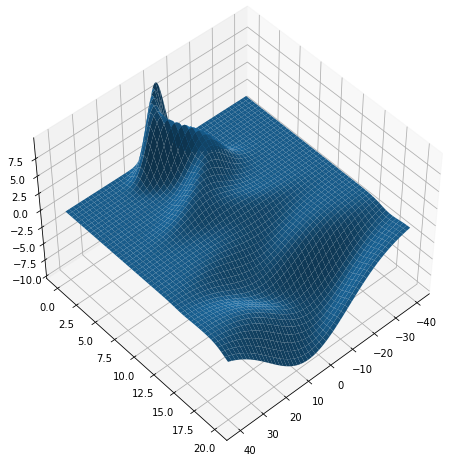

In [65]:
# Plotting
fig = plt.figure(figsize=(13,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, zz)

# Choose the default view
ax.view_init(azim=48, elev=48)

## Gradient descent for linear 1D model: python *v.s.* NumPy

Cf. the [full NumPy lecture notebook](https://nbviewer.jupyter.org/github/rmadar/lecture-python/blob/master/lectures/2-NumpyIntroduction.ipynb) (very last section), given at the Data Science Training from UCA.